In [37]:
# Genevieve Mortensen for I790 modified 02/15/2023

import sklearn as sk
import pandas as pd
import scanpy as sc
import anndata as an
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
fullpreg = pd.read_csv("../workable-data/pregnant_full_data_2.csv")
del fullpreg[fullpreg.columns[0]]
fullpreg.set_index('MBI.Sample.ID', inplace=True)
fullpreg.index.name = None
fullpreg.pop('UNGROUPED')
for k in fullpreg.keys():
  if k.startswith('PEPTIDYLPROLYL-ISOMERASE-RXN'):
    fullpreg.pop(k)

preg = pd.read_csv("../workable-data/pregnant_data_2.csv")
del preg[preg.columns[0]]
preg.set_index('MBI.Sample.ID', inplace=True)
preg.index.name = None
preg.pop('UNGROUPED')
for k in preg.keys():
  if k.startswith('PEPTIDYLPROLYL-ISOMERASE-RXN'):
    preg.pop(k)
    
case = pd.read_csv("../workable-data/case_2.csv")
del case[case.columns[0]]
case.set_index('MBI.Sample.ID', inplace=True)
case.index.name = None
for k in case.keys():
  if k.startswith('PEPTIDYLPROLYL-ISOMERASE'):
    case.pop(k)

conts = pd.read_csv("../workable-data/conts_2.csv")
del conts[conts.columns[0]]
conts.set_index('MBI.Sample.ID', inplace=True)
conts.index.name = None
for k in conts.keys():
  if k.startswith('PEPTIDYLPROLYL-ISOMERASE'):
    conts.pop(k)
conts_an = an.AnnData(conts)

c:\Users\genev\anaconda3\envs\bioinformatics\lib\site-packages\ipykernel_launcher.py:34: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



c:\Users\genev\anaconda3\envs\bioinformatics\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


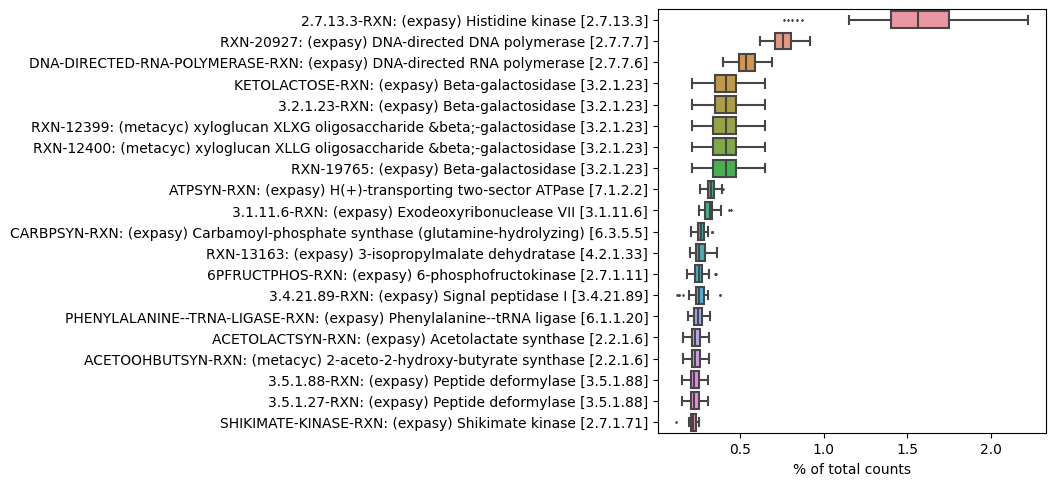

In [39]:
preggo_an = an.AnnData(preg)
sc.pl.highest_expr_genes(preggo_an, n_top=20,)

c:\Users\genev\anaconda3\envs\bioinformatics\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


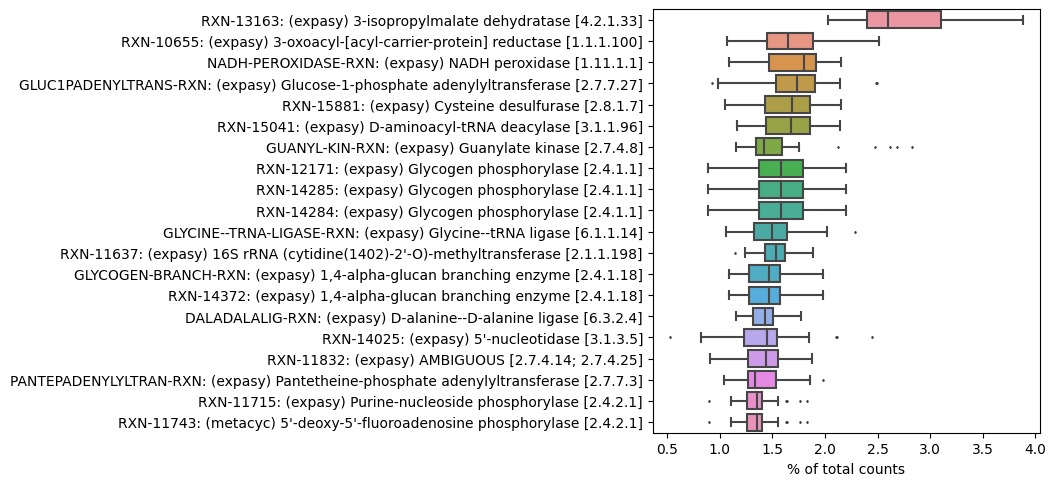

In [40]:
case_an = an.AnnData(case)
case_an
sc.pl.highest_expr_genes(case_an, n_top=20, )

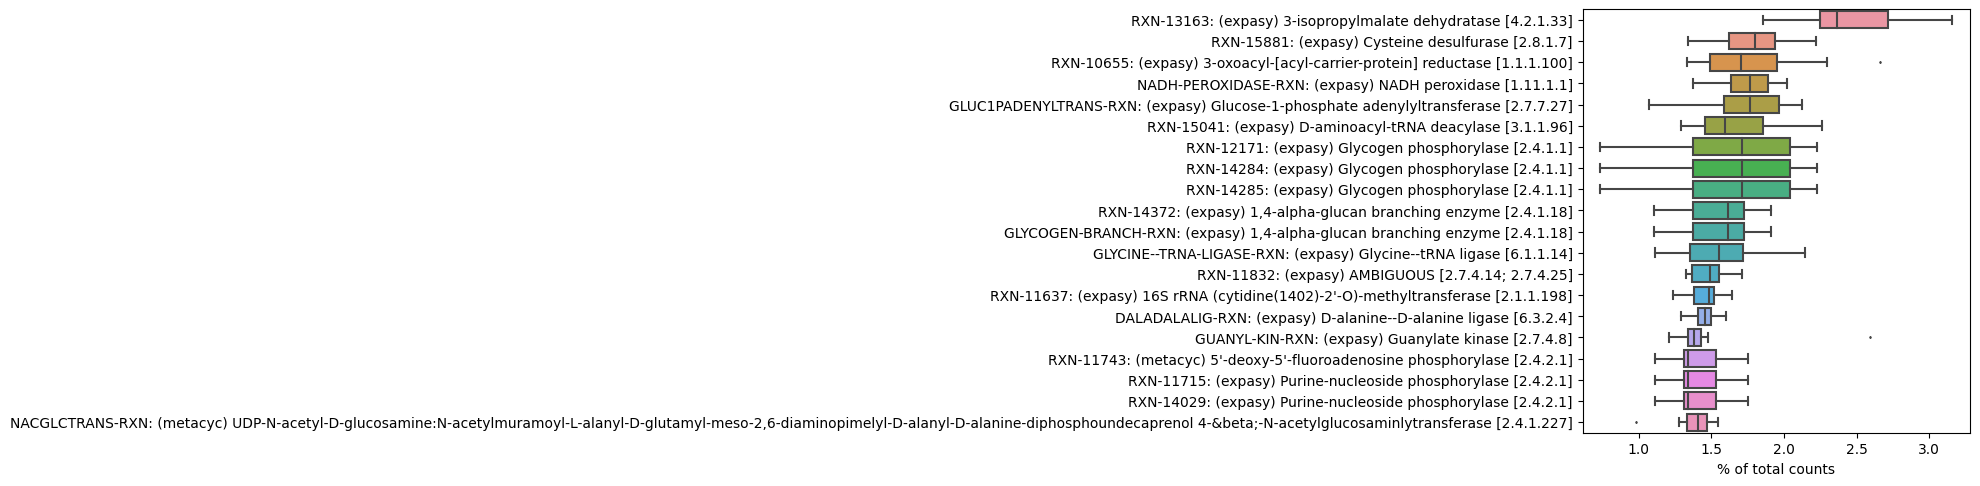

In [41]:
conts_an
sc.pl.highest_expr_genes(conts_an, n_top=20, )

In [48]:
#https://plotly.com/python/pca-visualization/
import plotly.express as px
import pandas as pd

In [73]:
features = fullpreg.columns[1:1570]
other = fullpreg.columns[1571:]
other

Index(['Subject.ID', 'Specimen.ID', 'Sampling.Date', 'Sample.Type', 'Group',
       'Race', 'Visit.Type', 'Tobacco.Use', 'BMI', 'Consent.Age', 'Comments',
       'seed', 'RandUni', 'Hypertension', 'Diabetes'],
      dtype='object')

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=500)
components = pca.fit_transform(fullpreg[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [78]:
fig = px.scatter_matrix(
components,
labels = labels,
dimensions = range(4),
color = fullpreg["Group"])
fig.update_traces(diagonal_visible=False)
fig.show()

In [79]:
fig2 = px.scatter(components, x = 0, y = 1, color=fullpreg['Group'])
fig2.show()